In [1]:
import os
import plotly.express as px
import plotly.io as pio

# Replace these paths with your dataset directory structure
train_dir = "../Data/images/train"
test_dir = "../Data/images/test"

# Function to count the number of images in each class
def count_images_in_classes(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            class_counts[class_name] = num_images
    return class_counts

# Get class counts for train and test directories
train_class_counts = count_images_in_classes(train_dir)
test_class_counts = count_images_in_classes(test_dir)

# Combine train and test class counts
combined_class_counts = {class_name: train_class_counts.get(class_name, 0) + test_class_counts.get(class_name, 0)
                         for class_name in set(train_class_counts) | set(test_class_counts)}

# Create a pie chart with a green color gradient
labels = combined_class_counts.keys()
values = combined_class_counts.values()

fig = px.pie(names=labels, values=values, title="",
             color_discrete_sequence=px.colors.sequential.Reds)

# Save the pie chart as an image
output_image_path = "class_distribution_pie_chart.png"
pio.write_image(fig, output_image_path)

print("Pie chart saved as:", output_image_path)


Pie chart saved as: class_distribution_pie_chart.png


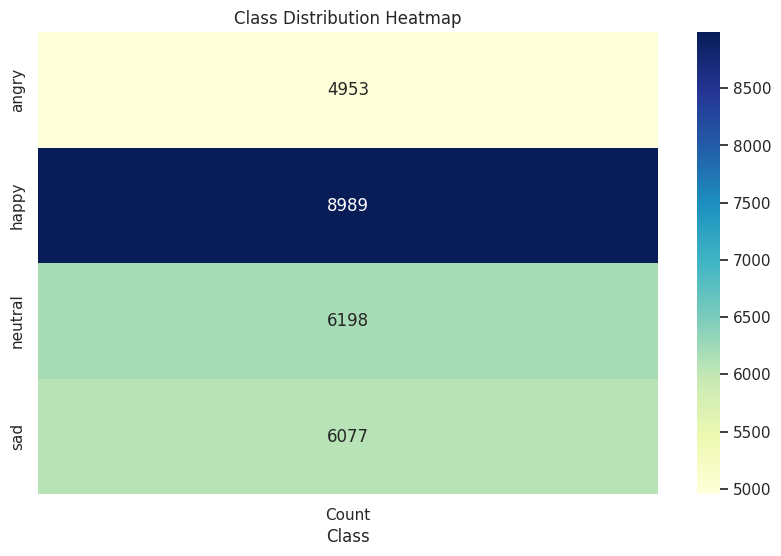

Heatmap saved as: class_distribution_heatmap.png


ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [3]:
import os
import pandas as pd
import plotly.express as px
import plotly.io as pio
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Replace these paths with your dataset directory structure
train_dir = "../Data/images/train"
test_dir = "../Data/images/test"
# Function to count the number of images in each class
def count_images_in_classes(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            class_counts[class_name] = num_images
    return class_counts

# Get class counts for train and test directories
train_class_counts = count_images_in_classes(train_dir)
test_class_counts = count_images_in_classes(test_dir)

# Combine train and test class counts
combined_class_counts = {class_name: train_class_counts.get(class_name, 0) + test_class_counts.get(class_name, 0)
                         for class_name in set(train_class_counts) | set(test_class_counts)}

# Create a heatmap
class_labels = list(combined_class_counts.keys())
class_counts = list(combined_class_counts.values())

data = {"Class": class_labels, "Count": class_counts}
df = pd.DataFrame(data)

sns.set()
plt.figure(figsize=(10, 6))
sns.heatmap(df.pivot_table(values='Count', index='Class', columns=None), annot=True, cmap="YlGnBu", fmt='d')
plt.title("Class Distribution Heatmap")
plt.xlabel("Class")
plt.ylabel("")

# Save the heatmap as an image
heatmap_image_path = "class_distribution_heatmap.png"
plt.savefig(heatmap_image_path, bbox_inches='tight')
plt.show()

print("Heatmap saved as:", heatmap_image_path)

# Create a PCA or t-SNE visualization
image_features = []  # You need to extract features from your images here

# Assuming you have extracted features from your images, store them in 'image_features'
# You can use PCA or t-SNE for dimensionality reduction and visualization
# Here's an example using PCA:

# Create a PCA model
pca = PCA(n_components=2)
pca_result = pca.fit_transform(image_features)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(data={'PC1': pca_result[:, 0], 'PC2': pca_result[:, 1]})

# Plot the 2D PCA visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue=df['Class'], palette='viridis', legend='full')
plt.title("PCA Visualization of Images")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Class', loc='upper right')

# Save the PCA visualization as an image
pca_image_path = "pca_visualization.png"
plt.savefig(pca_image_path, bbox_inches='tight')
plt.show()

print("PCA visualization saved as:", pca_image_path)
